[View in Colaboratory](https://colab.research.google.com/github/hewlett-hwi/aistudy/blob/master/mnist_test.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [0]:
keep_prob = tf.placeholder(tf.float32) # Dropout 과정에서 off 시키지 않을 Node의 비율을 정할 때 활용됩니다.

In [0]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [0]:
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 

L1 = tf.nn.dropout(L1, keep_prob)

In [0]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

In [0]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [11]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
total_batch

550

In [12]:
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8}) # 80% 만 유지하고 20% 를 학습 시마다 off 합니다.
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.426
Epoch: 0002 Avg. cost = 0.161
Epoch: 0003 Avg. cost = 0.114
Epoch: 0004 Avg. cost = 0.089
Epoch: 0005 Avg. cost = 0.074
Epoch: 0006 Avg. cost = 0.060
Epoch: 0007 Avg. cost = 0.054
Epoch: 0008 Avg. cost = 0.047
Epoch: 0009 Avg. cost = 0.041
Epoch: 0010 Avg. cost = 0.036
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.029
Epoch: 0014 Avg. cost = 0.027
Epoch: 0015 Avg. cost = 0.027
최적화 완료!


In [13]:
#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1})) # 정확도를 측정하는 Test 단계에서는 전체 Node를 살려줘야 합니다.

정확도: 0.9814


In [0]:
# 모델의 예측값을 labels 변수에 담아줍니다 (아래 시각화에서 예측값을 실제 그림과 함께 보여줍니다.)
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1}) 

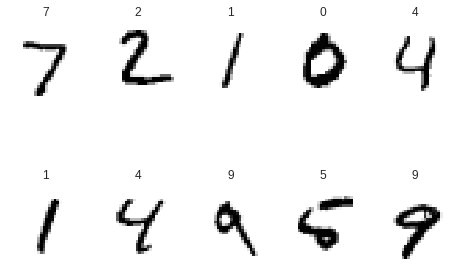

In [15]:
fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()